In [397]:
## Pymaceuticals Inc.
## Jack Cohen

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem


# Locate data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Import mouse data and study results
mouse_md = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [400]:
# Merge dataframes into one
combo = pd.merge(study_results,mouse_md,on='Mouse ID',how='inner')
combo.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [401]:
# Checking number of mice
print(f"{len(combo['Mouse ID'].unique())} mice")

249 mice


In [402]:
# Find ID of duplicate mice that shows up for Mouse ID and Timepoint
duplicates = combo[combo.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_mouse = duplicates['Mouse ID'].unique()
dup_mouse[0]

'g989'

In [403]:
# Display all data for the duplicate mouse
dups_df = combo.loc[combo["Mouse ID"]==dup_mouse[0]]
dups_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [404]:
# Drop all data regarding duplicated mouse from DataFrame
combo_df = combo.loc[combo['Mouse ID'] != dup_mouse[0]]
combo_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [405]:
# Checking number of mice in cleaned DataFrame
print(f"{len(combo_df['Mouse ID'].unique())} mice")

248 mice


In [406]:
## Summary Statistics
# Grouping by drug regimen, calculate tumor volume mean, median, variance, std, std error
tumor_grouped = combo_df.groupby(by=['Drug Regimen'])

tumor_mean = tumor_grouped.mean()['Tumor Volume (mm3)']
tumor_median = tumor_grouped.median()['Tumor Volume (mm3)']
tumor_var = tumor_grouped.var()['Tumor Volume (mm3)']
tumor_std = tumor_grouped.std()['Tumor Volume (mm3)']
tumor_sem = tumor_grouped.sem()['Tumor Volume (mm3)']

tumor_stats = pd.DataFrame(data={'Mean Tumor Volume':tumor_mean,
                         'Median Tumor Volume':tumor_median,
                          'Tumor Volume Variance':tumor_var,
                          'Tumor Volume Std. Dev.':tumor_std,
                          'Tumor Volume Std. Err.':tumor_sem})
tumor_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [408]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg_stats = tumor_grouped.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
tumor_agg_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


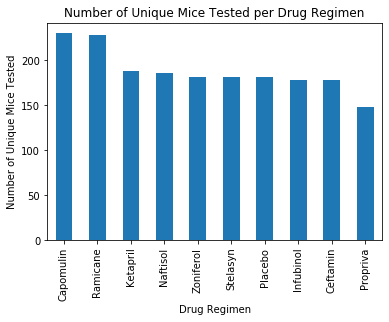

In [442]:
## Bar and Pie Charts
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas
mouse_count = tumor_grouped.count()['Mouse ID'].sort_values(ascending=False)
mouse_count = pd.DataFrame(mouse_count).reset_index()
ax = mouse_count.plot.bar(x='Drug Regimen',
                     title='Number of Unique Mice Tested per Drug Regimen',legend=False)
ax.set_ylabel('Number of Unique Mice Tested')
ax

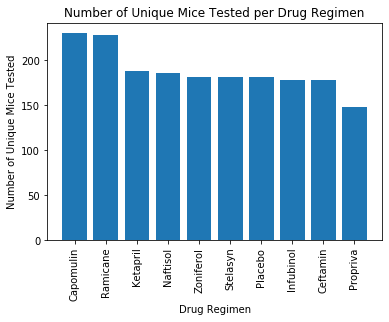

In [414]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
drug = mouse_count['Drug Regimen']
mice = mouse_count['Mouse ID']
plt.bar(drug,mice)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.title('Number of Unique Mice Tested per Drug Regimen')
plt.show()

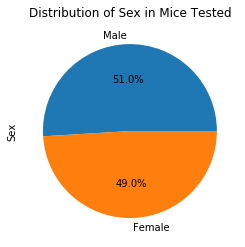

In [411]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = combo_df['Sex'].value_counts()
sex_df.plot.pie(y='Sex',autopct='%1.1f%%',legend=False,title='Distribution of Sex in Mice Tested')

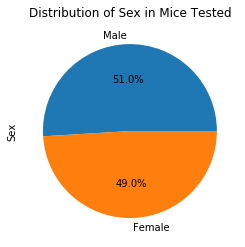

In [412]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df,labels=sex_df.index,autopct='%1.1f%%')
plt.title('Distribution of Sex in Mice Tested')
plt.ylabel('Sex')
plt.show()

In [396]:
## Quartiles, Outliers, and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint